In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})
import seaborn as sns
sns.set()

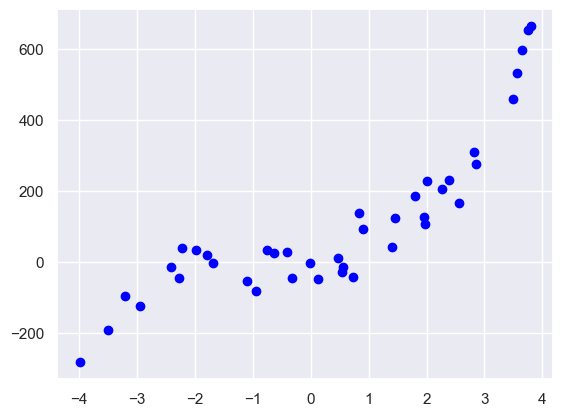

In [212]:
# Let's create a random 3rd grade polynomial with some noise
sample_size = 40
interval_lenght = 8
noise_level = 25

x = interval_lenght*(np.random.rand(sample_size,1) - 0.5)
y = np.random.normal(0,10,sample_size).reshape(sample_size,1)
ones = np.ones(smaple_size).reshape(-1,1)
c = np.random.rand(4,1)*noise_level
x2 = x*x
x3 = x2*x

X = np.concatenate((ones,x,x2,x3),axis=1)

# 3rd grade polynomial
Y = X @ c + y*5

plt.scatter(x,Y,c='blue')
plt.show()

(4, 1)


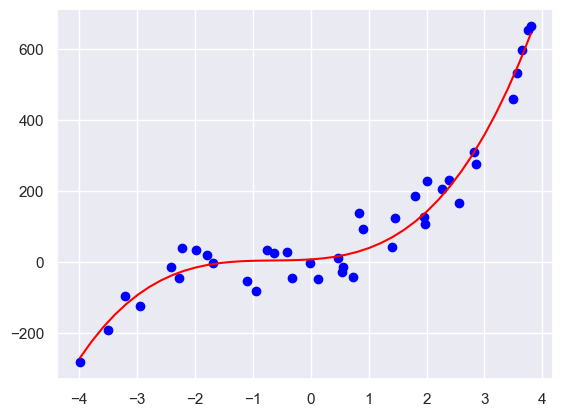

In [229]:
# Estimate Weights (in this case, the weights correspond to the polynomial coefficients
W = np.linalg.inv(X.T @ X) @ X.T @ Y
# Creation of a test set
test_set = np.linspace(min(x),max(x),sample_size).reshape(-1,1)
t_set_2 = test_set*test_set
t_set_3 = test_set*t_set_2
test_input = np.concatenate((ones,test_set,t_set_2,t_set_3),axis=1)

# Estimation of the test set
test_output = test_input @ W

# Plotting the real values (blue points) vs the predictive model estimation (red line)
plt.scatter(x,Y,c='blue')
plt.plot(test_set,test_output,c='red')
plt.show()

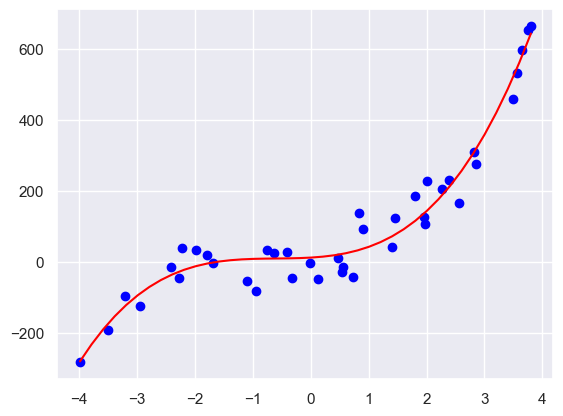

In [233]:
# The same process but using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
W = linear_model.coef_
b = linear_model.intercept_
W[0][0] = b[0]
test_output = test_input @ W.reshape(-1,1)

plt.scatter(x,Y,c='blue')
plt.plot(test_set,test_output,c='red')
plt.show()

